In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [2]:
data=pd.read_csv('/Users/jimmyfu87/Documents/大學課程/商業分析：行銷與決策/Data/nba.games.stats.csv')
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [3]:
df.shape

(9840, 41)

In [4]:
#查看各欄位屬性
df.dtypes

Unnamed: 0                    int64
Team                         object
Game                          int64
Date                         object
Home                         object
Opponent                     object
WINorLOSS                    object
TeamPoints                    int64
OpponentPoints                int64
FieldGoals                    int64
FieldGoalsAttempted           int64
FieldGoals.                 float64
X3PointShots                  int64
X3PointShotsAttempted         int64
X3PointShots.               float64
FreeThrows                    int64
FreeThrowsAttempted           int64
FreeThrows.                 float64
OffRebounds                   int64
TotalRebounds                 int64
Assists                       int64
Steals                        int64
Blocks                        int64
Turnovers                     int64
TotalFouls                    int64
Opp.FieldGoals                int64
Opp.FieldGoalsAttempted       int64
Opp.FieldGoals.             

# Feature Engineering

In [5]:
#加入防守籃板
df['DefRebounds']=df['TotalRebounds']-df['OffRebounds']
#加入兩分球出手次數
df['X2PointShotsAttempted']=df['FieldGoalsAttempted']-df['X3PointShotsAttempted']
#加入兩分球出手次數佔Fieldgoal(總出手次數)的比例
df['X2PointShotsAttempted']=df['X2PointShotsAttempted']/df['FieldGoalsAttempted']
#加入三分球出手次數佔Fieldgoal(總出手次數)的比例
df['X3PointsAttemptRatio']=df['X3PointShotsAttempted']/df['FieldGoalsAttempted']
#加入勝分差
df['Pointdif']=df['TeamPoints']/df['OpponentPoints']

In [6]:
#將年份type轉為datetime的type，比較時間先後
year1=datetime.datetime.strptime('2015-07-01', "%Y-%m-%d").date()
year2=datetime.datetime.strptime('2016-07-01', "%Y-%m-%d").date()
year3=datetime.datetime.strptime('2017-07-01', "%Y-%m-%d").date()
year4=datetime.datetime.strptime('2018-07-01', "%Y-%m-%d").date()
for i in range(9840):
    df.iloc[i,3] = datetime.datetime.strptime(df.iloc[i,3],'%Y-%m-%d').date()

In [7]:
#依據年份給予年份的feature
df.loc[(df['Date'] < year1),'Year']='201415'
df.loc[(df['Date'] > year1) & (df['Date'] < year2),'Year']='201516'
df.loc[(df['Date'] > year2) & (df['Date'] < year3),'Year']='201617'
df.loc[(df['Date'] > year3) & (df['Date'] < year4),'Year']='201718'

In [8]:
year1_size=df.loc[df['Year'] == "201415"].Year.count()
year2_size=df.loc[df['Year'] == "201516"].Year.count()
year3_size=df.loc[df['Year'] == "201617"].Year.count()
year4_size=df.loc[df['Year'] == "201718"].Year.count()
print(year1_size,year2_size,year3_size,year4_size)

2460 2460 2460 2460


In [9]:
df.columns

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls', 'DefRebounds', 'X2PointShotsAttempted',
       'X3PointsAttemptRatio', 'Pointdif', 'Year'],
      dtype='object')

# Correlation of Features

In [10]:
#移除Corr不需要的欄位
rm_1=df.iloc[:,7:]
drop_elements=['Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls']
col_crr=rm_1.drop(drop_elements,axis=1)
col_crr.columns

Index(['TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'DefRebounds', 'X2PointShotsAttempted',
       'X3PointsAttemptRatio', 'Pointdif', 'Year'],
      dtype='object')

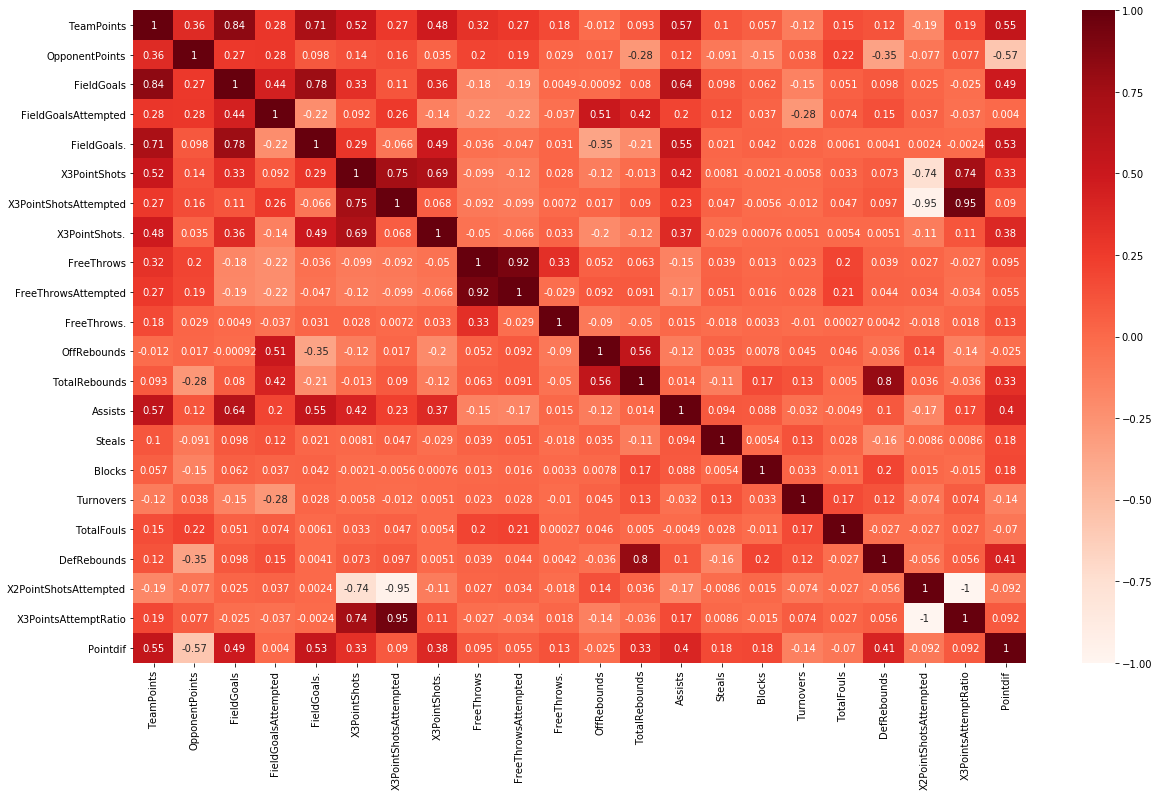

In [11]:
plt.figure(figsize=(20,12))
cor = col_crr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# 討論相關係數>0.8的變數關係

Teampoints和FieldGoals高度相關，因為得分和投籃次數本來就高度相關，不需討論(X)

X3PointShotsAttempted和X3PointsAttemptRatio、X2PointShotsAttempted相關性高，三分球出手本來就會影響兩分球出手，不需討論(X)

DefRebounds和TotalRebounds相關係數(0.8)，因為大部分籃板皆為防守籃板，因此也不需討論(X)

# Data Visualization

In [12]:
#將年份拆開根據index拆開(iloc)
nba201415=df.iloc[0:2460,]
nba201516=df.iloc[2460:4920,]
nba201617=df.iloc[4920:7380,]
nba201718=df.iloc[7380:9840,]
nba_size=[nba201415.shape,nba201516.shape,nba201617.shape,nba201718.shape]
print(nba_size)

[(2460, 46), (2460, 46), (2460, 46), (2460, 46)]


In [13]:
#NBA三分球佔出手比例的各年的中位數
X3RatioMedian201415=nba201415['X3PointsAttemptRatio'].median(0)
X3RatioMedian201516=nba201516['X3PointsAttemptRatio'].median(0)
X3RatioMedian201617=nba201617['X3PointsAttemptRatio'].median(0)
X3RatioMedian201718=nba201718['X3PointsAttemptRatio'].median(0)
X3RatioMedian=[X3RatioMedian201415,X3RatioMedian201516,X3RatioMedian201617,X3RatioMedian201718]
print(X3RatioMedian)

[0.26582278481012656, 0.2808988764044944, 0.3125, 0.3333333333333333]


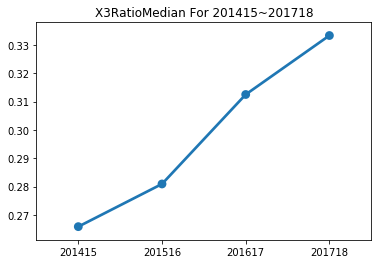

In [14]:
#NBA三分球佔出手比例的趨勢(折線圖)
year=['201415','201516','201617','201718']
dic_pointplot={"Year":year,"X3RatioMedian":X3RatioMedian}
plt.title('X3RatioMedian For 201415~201718')
sns.pointplot(x="Year",y="X3RatioMedian",data=dic_pointplot)

NBA三分球出手比例確實有提升的趨勢

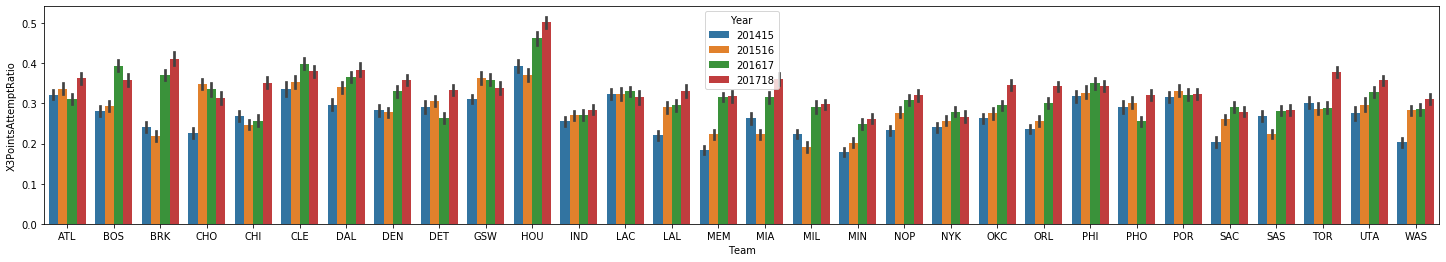

In [15]:
plt.figure(figsize=(25,4))#(橫的長度,縱的長度)
sns.barplot(x="Team", y="X3PointsAttemptRatio", hue="Year", data=df)

In [16]:
total_team=df.groupby(["Team"]).sum()
total_team['X3PointShotsAttempted'].sort_values(ascending=False)

Team
HOU    11989
CLE    10096
GSW     9740
DAL     9585
BOS     9397
PHI     9303
ATL     9159
POR     9147
DEN     8876
LAC     8833
TOR     8674
BRK     8656
CHO     8556
DET     8479
OKC     8415
PHO     8306
UTA     8290
LAL     8056
NOP     8042
ORL     7960
CHI     7959
MIA     7858
WAS     7567
IND     7524
NYK     7312
SAS     7269
SAC     7116
MEM     7088
MIL     6747
MIN     6138
Name: X3PointShotsAttempted, dtype: int64

# 探討崛起的勇士隊

In [17]:
#用index選的函數iloc
#選出特定年份的勇士隊
GSW201415=nba201415.loc[df['Team'] == "GSW"]
GSW201516=nba201516.loc[df['Team'] == "GSW"]
GSW201617=nba201617.loc[df['Team'] == "GSW"]
GSW201718=nba201718.loc[df['Team'] == "GSW"]
gsw_size=[GSW201415.shape,GSW201516.shape,GSW201617.shape,GSW201718.shape]
print(gsw_size)

[(82, 46), (82, 46), (82, 46), (82, 46)]


In [18]:
X3RatioMedian201415_gsw=GSW201415['X3PointsAttemptRatio'].median(0)
X3RatioMedian201516_gsw=GSW201516['X3PointsAttemptRatio'].median(0)
X3RatioMedian201617_gsw=GSW201617['X3PointsAttemptRatio'].median(0)
X3RatioMedian201718_gsw=GSW201718['X3PointsAttemptRatio'].median(0)
X3RatioMedian_gsw=[X3RatioMedian201415_gsw,X3RatioMedian201516_gsw,X3RatioMedian201617_gsw,X3RatioMedian201718_gsw]

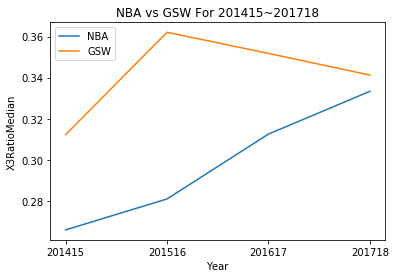

In [19]:
#勇士隊vsNBA三分球佔出手比例的趨勢(折線圖)
year=['201415','201516','201617','201718']
plt.title('NBA vs GSW For 201415~201718')
plt.plot(year,X3RatioMedian)
plt.plot(year,X3RatioMedian_gsw)
plt.legend(['NBA','GSW'],loc='upper left')
plt.xlabel('Year')
plt.ylabel('X3RatioMedian')
plt.show()

# Q:三分球命中率和助攻相關性(NBA vs GSW)

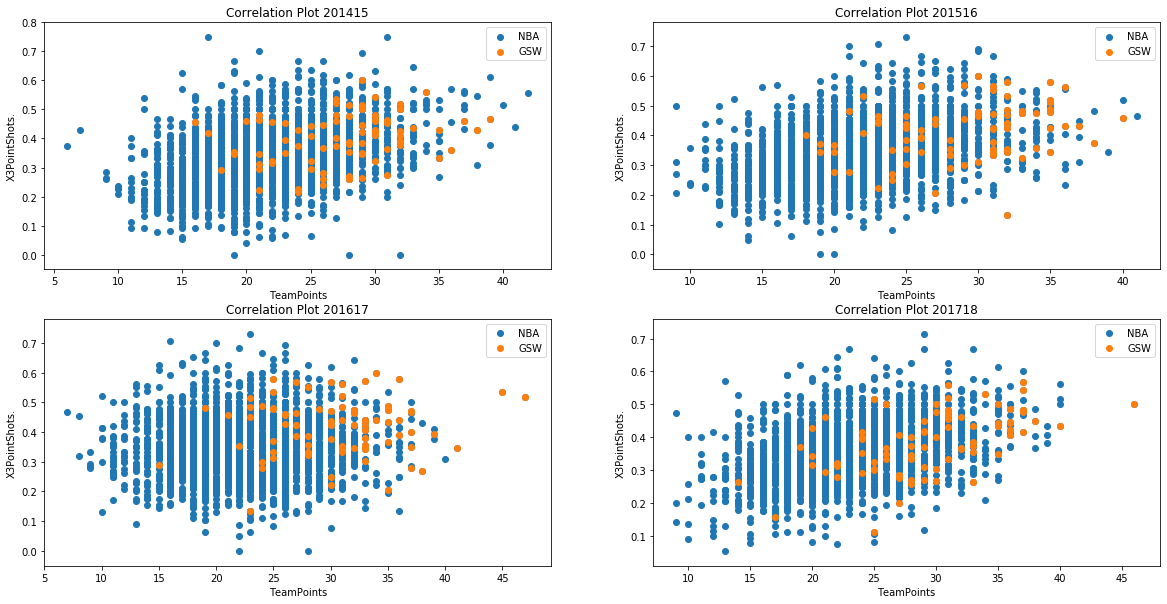

In [20]:
Assists_nba_1415=nba201415.loc[:,'Assists']
Assists_gsw_1415=nba201415.loc[df['Team'] == "GSW"].loc[:,'Assists']
X3PointShots_points_nba_1415=nba201415.iloc[:,14]
X3PointShots_points_gsw_1415=nba201415.loc[df['Team'] == "GSW"].iloc[:,14]

Assists_nba_1516=nba201516.loc[:,'Assists']
Assists_gsw_1516=nba201516.loc[df['Team'] == "GSW"].loc[:,'Assists']
X3PointShots_points_nba_1516=nba201516.iloc[:,14]
X3PointShots_points_gsw_1516=nba201516.loc[df['Team'] == "GSW"].iloc[:,14]

Assists_nba_1617=nba201617.loc[:,'Assists']
Assists_gsw_1617=nba201617.loc[df['Team'] == "GSW"].loc[:,'Assists']
X3PointShots_points_nba_1617=nba201617.iloc[:,14]
X3PointShots_points_gsw_1617=nba201617.loc[df['Team'] == "GSW"].iloc[:,14]

Assists_nba_1718=nba201718.loc[:,'Assists']
Assists_gsw_1718=nba201718.loc[df['Team'] == "GSW"].loc[:,'Assists']
X3PointShots_points_nba_1718=nba201718.iloc[:,14]
X3PointShots_points_gsw_1718=nba201718.loc[df['Team'] == "GSW"].iloc[:,14]

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(Assists_nba_1415, X3PointShots_points_nba_1415,label='NBA')                   
plt.scatter(Assists_gsw_1415, X3PointShots_points_gsw_1415,label='GSW')           
plt.title("Correlation Plot 201415")    
plt.xlabel("TeamPoints")               
plt.ylabel("X3PointShots.")     
plt.legend(['NBA','GSW'])

plt.subplot(222)
plt.scatter(Assists_nba_1516, X3PointShots_points_nba_1516,label='NBA')                   
plt.scatter(Assists_gsw_1516, X3PointShots_points_gsw_1516,label='GSW')           
plt.title("Correlation Plot 201516")    
plt.xlabel("TeamPoints")               
plt.ylabel("X3PointShots.")     
plt.legend(['NBA','GSW'])

plt.subplot(223)
plt.scatter(Assists_nba_1617, X3PointShots_points_nba_1516,label='NBA')                   
plt.scatter(Assists_gsw_1617, X3PointShots_points_gsw_1516,label='GSW')           
plt.title("Correlation Plot 201617")    
plt.xlabel("TeamPoints")               
plt.ylabel("X3PointShots.")     
plt.legend(['NBA','GSW'])

plt.subplot(224)
plt.scatter(Assists_nba_1718, X3PointShots_points_nba_1718,label='NBA')                   
plt.scatter(Assists_gsw_1718, X3PointShots_points_gsw_1718,label='GSW')           
plt.title("Correlation Plot 201718")    
plt.xlabel("TeamPoints")               
plt.ylabel("X3PointShots.")     
plt.legend(['NBA','GSW'])
plt.show()

In [21]:
#可發現2014-15年，勇士隊三分球命中率和得分關係相較
corr_nba_1415=Assists_nba_1415.corr(X3PointShots_points_nba_1415)
corr_gsw_1415=Assists_gsw_1415.corr(X3PointShots_points_gsw_1415)
corr_nba_1516=Assists_nba_1516.corr(X3PointShots_points_nba_1516)
corr_gsw_1516=Assists_gsw_1516.corr(X3PointShots_points_gsw_1516)
corr_nba_1617=Assists_nba_1617.corr(X3PointShots_points_nba_1617)
corr_gsw_1617=Assists_gsw_1617.corr(X3PointShots_points_gsw_1617)
corr_nba_1718=Assists_nba_1718.corr(X3PointShots_points_nba_1718)
corr_gsw_1718=Assists_gsw_1718.corr(X3PointShots_points_gsw_1718)
corr_nba=pd.Series({'201415':corr_nba_1415,'201516':corr_nba_1516,'201617':corr_nba_1617,'201718':corr_nba_1718}) 
corr_gsw=pd.Series({'201415':corr_gsw_1415,'201516':corr_gsw_1516,'201617':corr_gsw_1617,'201718':corr_gsw_1718}) 
corr_df=pd.DataFrame({'NBA':corr_nba,'GSW':corr_gsw})
corr_df

,NBA,GSW
201415,0.368089,0.271984
201516,0.382054,0.330288
201617,0.356515,0.395411
201718,0.388111,0.525489


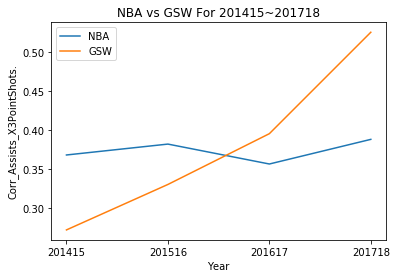

In [22]:
#勇士隊相關性原本低於聯盟平均，推測可能偏向自走砲;但逐年快速上升，推測勇士隊戰術逐漸倚賴團隊體系，三分投射手感和助攻數呈現越來越高相關性
year=['201415','201516','201617','201718']
plt.title('NBA vs GSW For 201415~201718')
plt.plot(year,corr_df.loc[:,'NBA'])
plt.plot(year,corr_df.loc[:,'GSW'])
plt.legend(['NBA','GSW'])
plt.xlabel('Year')
plt.ylabel('Corr_Assists_X3PointShots.')
plt.show()

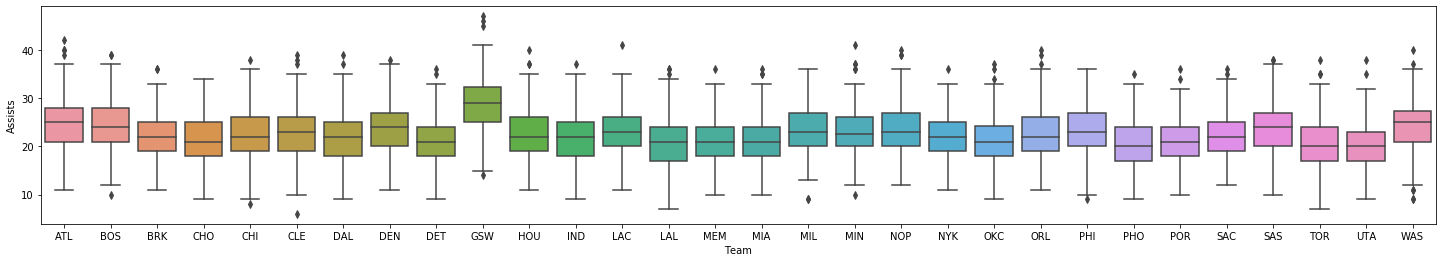

In [23]:
plt.figure(figsize=(25,4))#(橫的長度,縱的長度)
sns.boxplot(x="Team", y="Assists", data=df)

# Data Split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X =df[['X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls']]
y =df['WINorLOSS']
#Minmax標準化特徵值
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
Minmax_X=minmax_scale.fit_transform(X)
#Minmax後，(type會變numpy、column names會改變)，(轉回dataframe、columns=X.columns將column names還原)
X=pd.DataFrame(Minmax_X,columns=X.columns) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=33)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression(random_state=10,max_iter=100)
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_val)
lr_probs = lr_model.predict_proba(X_val)[:, 1]

# Decision Tree

In [26]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 3)
tree_model.fit(X_train,y_train)
# Predicting results for test dataset
tree_predictions = tree_model.predict(X_val)
tree_probs = tree_model.predict_proba(X_val)[:, 1]

<function matplotlib.pyplot.show(*args, **kw)>

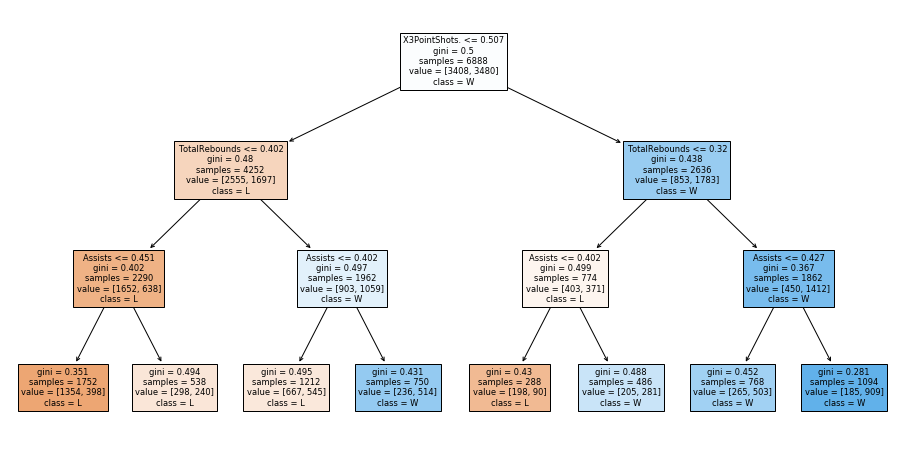

In [27]:
#決策樹視覺化，左邊是True，右邊是False(較簡單畫法)
y_train_df=pd.DataFrame(y_train) #將series轉成dataframe才可以放入class_names
plt.figure(figsize = (16, 8))
tree.plot_tree(tree_model,
               feature_names = X_train.columns,
               class_names = y_train_df.WINorLOSS,
               filled = True)#著色
plt.show

In [28]:
#決策樹視覺化，圖較大但有True/False
# import graphviz
# y_train_df=pd.DataFrame(y_train) #將series轉成dataframe才可以放入class_names
# dot_data=tree.export_graphviz(tree_model,
#                feature_names = X_train.columns,
#                class_names = y_train_df.WINorLOSS,
#                special_characters=True,
#                filled = True)#著色
# graph = graphviz.Source(dot_data)  
# graph

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rf_model.fit(X_train, y_train)
# Actual class predictions
rf_predictions = rf_model.predict(X_val)
# Probabilities for each class
rf_probs = rf_model.predict_proba(X_val)[:, 1]

# XGBoost

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree

xgb_model = XGBClassifier(max_depth=3, n_estimators=3000, learning_rate=0.0015)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)
xgb_probs = xgb_model.predict_proba(X_val)[:, 1]

In [ ]:
plot_tree(xgb_model)
plt.show

# ROC Curve、AUC

In [ ]:
from sklearn.metrics import roc_curve, auc
#Pos_label事先定義好
fpr, tpr, threshold =roc_curve(y_val, lr_probs,pos_label="W")
roc_auc = auc(fpr, tpr)
fpr0, tpr0, threshold0 =roc_curve(y_val, tree_probs,pos_label="W")
roc_auc0 = auc(fpr0, tpr0)
fpr1, tpr1, threshold1 =roc_curve(y_val, rf_probs,pos_label="W")
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 =roc_curve(y_val, xgb_probs,pos_label="W")
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',
             label='LR ROC curve (AUC = %0.2f)'%roc_auc)#四捨五入到小數點第二位
plt.plot(fpr0, tpr0, 'm',
             label='Tree ROC curve (AUC = %0.2f)'%roc_auc0)#四捨五入到小數點第二位
plt.plot(fpr1, tpr1, 'y',
             label='RF ROC curve (AUC = %0.2f)'%roc_auc1)#四捨五入到小數點第二位
plt.plot(fpr2, tpr2, 'b',
             label='XGB ROC curve (AUC = %0.2f)'%roc_auc2)#四捨五入到小數點第二位
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()   

# Pytorch實作

In [33]:
import torch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score
df.loc[(df['WINorLOSS'] == 'W'),'Result']=1
df.loc[(df['WINorLOSS'] == 'L'),'Result']=0
label='Result'
target = torch.tensor(df[label].values,dtype=torch.float)   #0 or 1
#target.shape

In [13]:
drop_target=[label]
features_col=df.drop(drop_target,axis=1)
features=torch.tensor(features_col[['X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.']].values,dtype=torch.float)
features.shape

torch.Size([9840, 3])

In [14]:
target=target.float()
features=features.float()

In [15]:
X_train,X_validate,y_train,y_validate= train_test_split(features,target,test_size=0.4,random_state=0)

In [16]:
#feature的數量
feature_num=features.shape[1]
Net = torch.nn.Sequential(
    torch.nn.Linear(feature_num, 30), 
    torch.nn.ReLU(),
    torch.nn.Linear(30, 1)
)
model = Net
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [17]:
"""
feature_num=features.shape[1]
class Net2(torch.nn.Module):
    def __init__(self):
        super(Net2,self).__init__()
        self.fc1 = torch.nn.Linear(feature_num,3)
        self.fc2 = torch.nn.Linear(3,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = torch.nn.functional.ReLU(x)
        x = self.fc2(x)
        return x
             
    def predict(self,x):
        pred = torch.nn.functional.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
model=Net2()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
"""

'\nfeature_num=features.shape[1]\nclass Net2(torch.nn.Module):\n    def __init__(self):\n        super(Net2,self).__init__()\n        self.fc1 = torch.nn.Linear(feature_num,3)\n        self.fc2 = torch.nn.Linear(3,2)\n        \n    def forward(self,x):\n        x = self.fc1(x)\n        x = torch.nn.functional.ReLU(x)\n        x = self.fc2(x)\n        return x\n             \n    def predict(self,x):\n        pred = torch.nn.functional.softmax(self.forward(x))\n        ans = []\n        for t in pred:\n            if t[0]>t[1]:\n                ans.append(0)\n            else:\n                ans.append(1)\n        return torch.tensor(ans)\nmodel=Net2()\noptimizer = torch.optim.Adam(model.parameters(), lr=0.0001)\n'

In [18]:
def fit(epoch,model,x , y, phase,batch_size ):
    if phase == 'training':
        model.train()
    elif phase == 'validation':
        model.eval()        
    losses=[]
    #permutation = torch.randperm(x.size()[0])
    #for i in tqdm(range(0,x.size()[0],batch_size)):
    y_predict = model(x)
    if phase == 'training':
        optimizer.zero_grad() #清空梯度
    loss = torch.nn.functional.mse_loss(y_predict, y)
    if phase == 'training':
        loss.backward()  #Backpropagation
        optimizer.step() #更新權重
    losses.append(loss.item())
    loss=np.average(losses)
    print('epoch: ',epoch, ',',phase,'loss is',loss,"  ,",phase,'accuracy is 1',)
    return loss

In [19]:
epoches = 100
batch_size=100
train_losses= []
val_losses= []
for epoch in range(1, epoches+1):
    epoch_loss = fit(epoch, Net, X_train, y_train,'training',batch_size)
    val_epoch_loss= fit(epoch, Net, X_validate, y_validate,'validation', batch_size)
    print('=' * 10)
    train_losses.append(epoch_loss)
    val_losses.append(val_epoch_loss)

/Users/jimmyfu87/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([5904])) that is different to the input size (torch.Size([5904, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if sys.path[0] == '':


epoch:  1 , training loss is 17.928268432617188   , training accuracy is 1
epoch:  1 , validation loss is 17.506961822509766   , validation accuracy is 1


/Users/jimmyfu87/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([3936])) that is different to the input size (torch.Size([3936, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if sys.path[0] == '':


epoch:  2 , training loss is 17.769485473632812   , training accuracy is 1
epoch:  2 , validation loss is 17.351024627685547   , validation accuracy is 1
epoch:  3 , training loss is 17.611543655395508   , training accuracy is 1
epoch:  3 , validation loss is 17.195903778076172   , validation accuracy is 1
epoch:  4 , training loss is 17.45442008972168   , training accuracy is 1
epoch:  4 , validation loss is 17.041624069213867   , validation accuracy is 1
epoch:  5 , training loss is 17.298145294189453   , training accuracy is 1
epoch:  5 , validation loss is 16.88820457458496   , validation accuracy is 1
epoch:  6 , training loss is 17.142730712890625   , training accuracy is 1
epoch:  6 , validation loss is 16.73563575744629   , validation accuracy is 1
epoch:  7 , training loss is 16.988183975219727   , training accuracy is 1
epoch:  7 , validation loss is 16.58394432067871   , validation accuracy is 1
epoch:  8 , training loss is 16.834522247314453   , training accuracy is 1
epoch

epoch:  52 , training loss is 11.028696060180664   , training accuracy is 1
epoch:  52 , validation loss is 10.745065689086914   , validation accuracy is 1
epoch:  53 , training loss is 10.918411254882812   , training accuracy is 1
epoch:  53 , validation loss is 10.6371431350708   , validation accuracy is 1
epoch:  54 , training loss is 10.809038162231445   , training accuracy is 1
epoch:  54 , validation loss is 10.530110359191895   , validation accuracy is 1
epoch:  55 , training loss is 10.700563430786133   , training accuracy is 1
epoch:  55 , validation loss is 10.423965454101562   , validation accuracy is 1
epoch:  56 , training loss is 10.592984199523926   , training accuracy is 1
epoch:  56 , validation loss is 10.318714141845703   , validation accuracy is 1
epoch:  57 , training loss is 10.486308097839355   , training accuracy is 1
epoch:  57 , validation loss is 10.214340209960938   , validation accuracy is 1
epoch:  58 , training loss is 10.380515098571777   , training accu

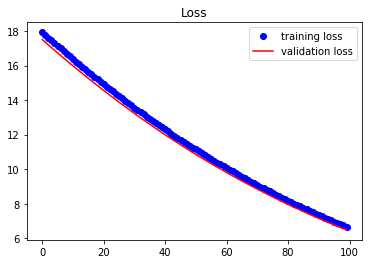

In [21]:
plt.figure(1)
plt.plot(train_losses, 'bo', label = 'training loss')
plt.plot(val_losses, 'r', label = 'validation loss')
plt.title("Loss")
plt.legend()
plt.show()